In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
vaccines_path = "Resources/country vaccinations.csv"
HDI_path = "Resources/HDI.csv"
OWIDCOVID_path = "Resources/owid-covid-data.csv"

vaccines_df = pd.read_csv(vaccines_path)
HDI_df = pd.read_csv(HDI_path)
OWIDCOVID_df = pd.read_csv(OWIDCOVID_path)

In [3]:
OWIDCOVID_work_df= pd.DataFrame({"Continent":OWIDCOVID_df["continent"],
                                   "Country":OWIDCOVID_df["location"],
                                   "People Vaccinated Total":OWIDCOVID_df["people_vaccinated"],
                                   "People Fully Vaccinated":OWIDCOVID_df["people_fully_vaccinated"],
                                   "% People Vaccinated":OWIDCOVID_df["people_vaccinated_per_hundred"],
                                   "% of People Fully Vaccinated":OWIDCOVID_df["people_fully_vaccinated_per_hundred"],
                                   "GDP per Capita":OWIDCOVID_df["gdp_per_capita"],
                                   "Human Development Index":OWIDCOVID_df["human_development_index"],
                                   "Population":OWIDCOVID_df["population"]})
OWIDCOVID_work_df.head()

,Continent,Country,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
0,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
1,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
2,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
3,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
4,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0


In [4]:
OWIDCOVID_clean_df = OWIDCOVID_work_df.groupby('Country')[["People Vaccinated Total", "People Fully Vaccinated", "% People Vaccinated", "% of People Fully Vaccinated", "GDP per Capita", "Human Development Index", "Population"]].max()
OWIDCOVID_clean_df.dropna(inplace = True)
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
Country,,,,,,,
Afghanistan,773002.0,430744.0,1.94,1.08,1803.987,0.511,39835428.0
Albania,895363.0,702833.0,31.17,24.46,11803.431,0.795,2872934.0
Algeria,5000000.0,3000000.0,11.21,6.72,13913.839,0.748,44616626.0
Angola,1165755.0,920570.0,3.44,2.71,5819.495,0.581,33933611.0
Antigua and Barbuda,43681.0,35709.0,44.24,36.17,21490.943,0.778,98728.0


In [5]:
OWIDCOVID_clean_df['% People Partially Vaccinated'] = ""
OWIDCOVID_clean_df['% People Partially Vaccinated'] = OWIDCOVID_clean_df["% People Vaccinated"] - OWIDCOVID_clean_df["% of People Fully Vaccinated"]

In [6]:
float_df = OWIDCOVID_clean_df["% of People Fully Vaccinated"].astype(float)

In [7]:
OWIDCOVID_clean_df['% People Partially Vaccinated'] = OWIDCOVID_clean_df['% People Partially Vaccinated'].astype(float).map("{:,.2f}%".format)
OWIDCOVID_clean_df['% of People Fully Vaccinated'] = OWIDCOVID_clean_df['% of People Fully Vaccinated'].astype(float).map("{:,.2f}%".format)
OWIDCOVID_clean_df['People Vaccinated Total'] = OWIDCOVID_clean_df['People Vaccinated Total'].astype(int)
OWIDCOVID_clean_df['People Fully Vaccinated'] = OWIDCOVID_clean_df['People Fully Vaccinated'].astype(int)
OWIDCOVID_clean_df['Population'] = OWIDCOVID_clean_df['Population'].astype(int)
OWIDCOVID_clean_df['GDP per Capita'] = OWIDCOVID_clean_df['GDP per Capita'].round(2)
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population,% People Partially Vaccinated
Country,,,,,,,,
Afghanistan,773002,430744,1.94,1.08%,1803.99,0.511,39835428,0.86%
Albania,895363,702833,31.17,24.46%,11803.43,0.795,2872934,6.71%
Algeria,5000000,3000000,11.21,6.72%,13913.84,0.748,44616626,4.49%
Angola,1165755,920570,3.44,2.71%,5819.50,0.581,33933611,0.73%
Antigua and Barbuda,43681,35709,44.24,36.17%,21490.94,0.778,98728,8.07%


In [8]:
OWIDCOVID_clean_df.drop(columns = '% People Vaccinated')
OWIDCOVID_clean_df = OWIDCOVID_clean_df[['People Vaccinated Total', 'People Fully Vaccinated','% People Partially Vaccinated','% of People Fully Vaccinated','GDP per Capita', 'Human Development Index', 'Population']]
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
Country,,,,,,,
Afghanistan,773002,430744,0.86%,1.08%,1803.99,0.511,39835428
Albania,895363,702833,6.71%,24.46%,11803.43,0.795,2872934
Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
Angola,1165755,920570,0.73%,2.71%,5819.50,0.581,33933611
Antigua and Barbuda,43681,35709,8.07%,36.17%,21490.94,0.778,98728


In [9]:
OWIDCOVID_clean_df.reset_index(inplace=True)
OWIDCOVID_clean_df.head()

,Country,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
0,Afghanistan,773002,430744,0.86%,1.08%,1803.99,0.511,39835428
1,Albania,895363,702833,6.71%,24.46%,11803.43,0.795,2872934
2,Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
3,Angola,1165755,920570,0.73%,2.71%,5819.50,0.581,33933611
4,Antigua and Barbuda,43681,35709,8.07%,36.17%,21490.94,0.778,98728


In [10]:
OWIDCOVID_cleancut_df = OWIDCOVID_clean_df.sample(n=24)
OWIDCOVID_cleancut_df

,Country,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
2,Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
120,Palestine,1185157,488649,13.33%,9.36%,4449.90,0.708,5222756
77,Italy,43774181,38584317,8.59%,63.92%,35220.08,0.892,60367471
147,South Korea,33152722,20061878,25.52%,39.10%,35938.37,0.916,51305184
40,Czechia,6006381,5841829,1.54%,54.47%,32605.91,0.900,10724553
176,Yemen,298161,13322,0.94%,0.04%,1479.15,0.470,30490639
130,Russia,45598793,39683652,4.05%,27.20%,24765.95,0.824,145912022
73,Iran,19467858,9684669,11.51%,11.39%,19082.62,0.783,85028760
83,Kiribati,19589,4640,12.32%,3.82%,1981.13,0.630,121388
76,Israel,6043382,5547653,5.64%,63.11%,33132.32,0.919,8789776


In [11]:
OWIDCOVID_cleancut_df = OWIDCOVID_cleancut_df.append(OWIDCOVID_clean_df.iloc[7])
OWIDCOVID_cleancut_df

,Country,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
2,Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
120,Palestine,1185157,488649,13.33%,9.36%,4449.90,0.708,5222756
77,Italy,43774181,38584317,8.59%,63.92%,35220.08,0.892,60367471
147,South Korea,33152722,20061878,25.52%,39.10%,35938.37,0.916,51305184
40,Czechia,6006381,5841829,1.54%,54.47%,32605.91,0.900,10724553
176,Yemen,298161,13322,0.94%,0.04%,1479.15,0.470,30490639
130,Russia,45598793,39683652,4.05%,27.20%,24765.95,0.824,145912022
73,Iran,19467858,9684669,11.51%,11.39%,19082.62,0.783,85028760
83,Kiribati,19589,4640,12.32%,3.82%,1981.13,0.630,121388
76,Israel,6043382,5547653,5.64%,63.11%,33132.32,0.919,8789776


In [12]:
from scipy.stats import linregress

In [13]:
OWIDCOVID_clean_df["GDP per Capita"].astype(int)

0       1803
1      11803
2      13913
3       5819
4      21490
       ...  
174     6171
175    15469
176     1479
177     3689
178     1899
Name: GDP per Capita, Length: 179, dtype: int32

This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and GDP per capita for countries around the world, r = 0.71, p = 0.0. This relationship explains 51% of the variance in the data indicating that a country with strong economy is more likely to be able to roll out the vaccine quicker potentially due to being able to afford paying for the vaccines and the necessary processes for an efficient roll out.


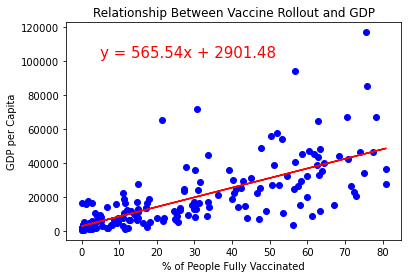

In [14]:
full_vaxxed = float_df
GDP = OWIDCOVID_clean_df["GDP per Capita"]

plt.title("Relationship Between Vaccine Rollout and GDP")
plt.xlabel("% of People Fully Vaccinated")
plt.ylabel("GDP per Capita")

(slope, intercept, rvalue, pvalue, stderr) = linregress(full_vaxxed, GDP)
regress_values = pd.Series(full_vaxxed) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(full_vaxxed, GDP, marker="o", color="blue")
plt.plot(full_vaxxed, regress_values, "r-")
plt.annotate(line_eq,(5,102000),fontsize = 15,color = "red")

print(f"This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and GDP per capita for countries around the world, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. This relationship explains 51% of the variance in the data indicating that a country with strong economy is more likely to be able to roll out the vaccine quicker potentially due to being able to afford paying for the vaccines and the necessary processes for an efficient roll out.")
plt.show()

This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and the Human Development Index for countries around the world, r = 0.79, p = 0.0. This relationship explains 63% of the variance in the data and indicates that the more developed a country is, the more likely it is to organise an effective vaccine rollout. .


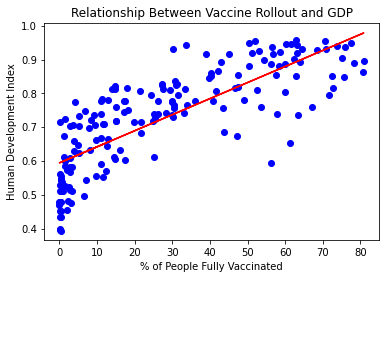

In [15]:
full_vaxxed = float_df
HDI = OWIDCOVID_clean_df["Human Development Index"]

plt.title("Relationship Between Vaccine Rollout and HDI")
plt.xlabel("% of People Fully Vaccinated")
plt.ylabel("Human Development Index")

(slope, intercept, rvalue, pvalue, stderr) = linregress(full_vaxxed, HDI)
regress_values = pd.Series(full_vaxxed) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(full_vaxxed, HDI, marker="o", color="blue")
plt.plot(full_vaxxed, regress_values, "r-")
plt.annotate(line_eq,(5,.05),fontsize = 15,color = "red")

print(f"This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and the Human Development Index for countries around the world, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. This relationship explains 63% of the variance in the data and indicates that the more developed a country is, the more likely it is to organise an effective vaccine rollout. .")
plt.show()

In [ ]:
OWIDCOVID_clean_df.loc[OWIDCOVID_clean_df['Country'] == "Australia"]